In [1]:
pwd

'C:\\Users\\New'

In [2]:
cd wine

C:\Users\New\wine


In [19]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [20]:
data=pd.read_csv('WineQT.csv')

In [21]:
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [22]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [23]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [24]:
data.shape

(1143, 13)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [26]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [27]:
data.isnull().sum()*100/data.shape[0]

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
Id                      0.0
dtype: float64

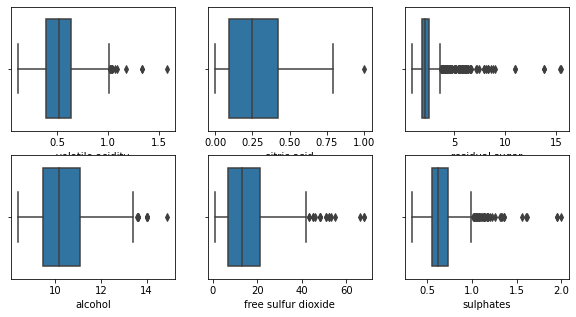

In [28]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['volatile acidity'],ax = axs[0,0])
plt2 = sns.boxplot(data['citric acid'],ax = axs[0,1])
plt3 = sns.boxplot(data['residual sugar'],ax = axs[0,2])
plt1 = sns.boxplot(data['alcohol'],ax = axs[1,0])
plt2 = sns.boxplot(data['free sulfur dioxide'],ax = axs[1,1])
plt3 = sns.boxplot(data['sulphates'],ax = axs[1,2])

In [29]:
data['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

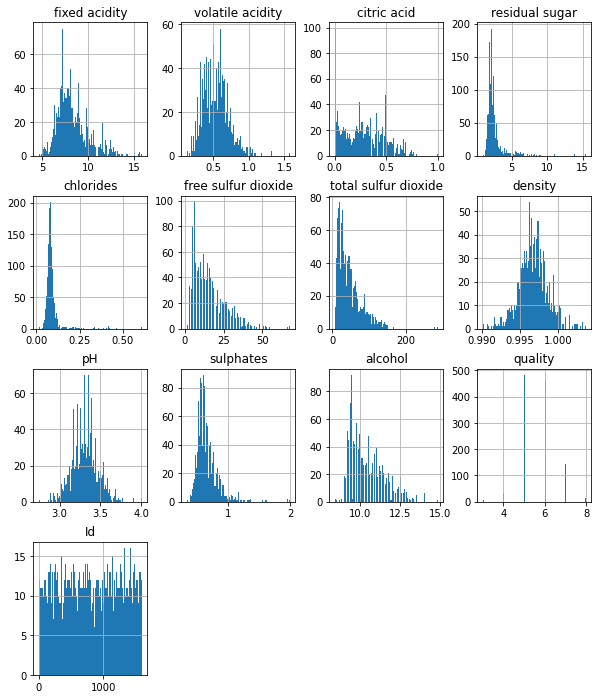

In [31]:
data.hist(bins=100,figsize=(10,12))
plt.show()

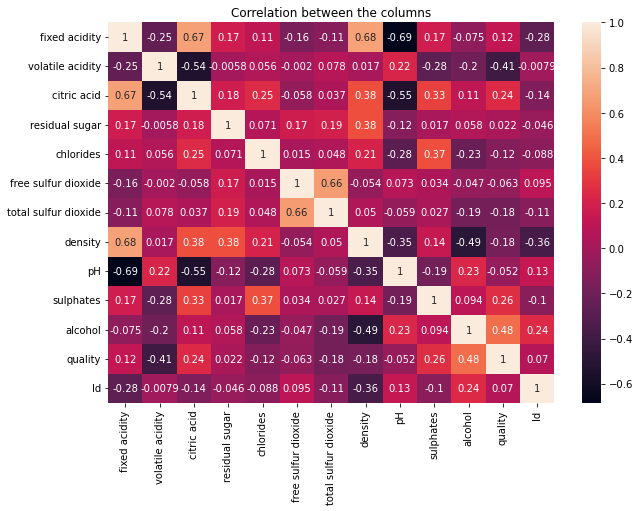

In [35]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation between the columns')
plt.show()

In [34]:
data.corr()['quality'].sort_values()

volatile acidity       -0.407394
total sulfur dioxide   -0.183339
density                -0.175208
chlorides              -0.124085
free sulfur dioxide    -0.063260
pH                     -0.052453
residual sugar          0.022002
Id                      0.069708
fixed acidity           0.121970
citric acid             0.240821
sulphates               0.257710
alcohol                 0.484866
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

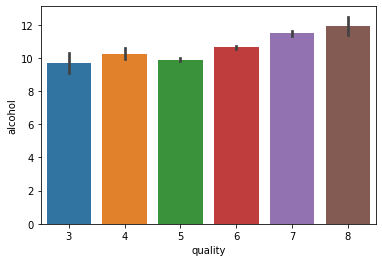

In [36]:
sns.barplot(data['quality'],data['alcohol'])

# Data Preprocessing

In [37]:
data['quality']=data.quality.apply(lambda x:1 if x>=7 else 0)

In [39]:
data['quality'].value_counts()

0    984
1    159
Name: quality, dtype: int64

In [40]:
x=data.drop('quality',axis=1)
y=data['quality']

In [44]:
X_train,X_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=42)

In [45]:
print("x_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

x_train (800, 12)
y_train (800,)
X_test (343, 12)
y_test (343,)


# Model Training 

In [46]:
logreg =LogisticRegression()
logreg.fit(X_train,y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc=accuracy_score(logreg_pred,y_test)
print("test accuracy is:{:.2f}%".format(logreg_acc*100))

test accuracy is:88.92%


In [47]:
print(classification_report(y_test,logreg_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       298
           1       0.65      0.33      0.44        45

    accuracy                           0.89       343
   macro avg       0.78      0.65      0.69       343
weighted avg       0.87      0.89      0.87       343



# Decision tree

In [50]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred= dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred,y_test)
print("Test accuracy: {:.2f}%".format(dtree_acc*100))

Test accuracy: 86.01%


In [51]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       298
           1       0.47      0.60      0.53        45

    accuracy                           0.86       343
   macro avg       0.71      0.75      0.72       343
weighted avg       0.88      0.86      0.87       343

